# Analyse exploratoire des donnees de titanic

#### **Source des donnees:** Kaggle

### Etape 1: Importation des bibliotheques requises pour l'analyse


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind,ttest_1samp,binomtest
from sklearn.preprocessing import LabelEncoder

### Etape 2: Chargement des donnees 

In [53]:
titanic_df1 = pd.read_csv('/home/moi/Programming_staffs/Titanic/data/train.csv')
titanic_df2 = pd.read_csv('/home/moi/Programming_staffs/Titanic/data/test.csv')
titanic_df = pd.concat([titanic_df1,titanic_df2])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Etape 3 : Observation globale de la dataset

In [54]:
titanic_df.shape

(1309, 12)

- Nombre de lignes: 891

- Nombre de colonnes: 12

In [55]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


- Variables Numeriques entieres: PassengerId, Survived, Pclass,SibSp,Parch
- Variables Numeriques reelles: Age, Fare 
- Variables chaines de caracteres: tous les autres 

In [56]:
titanic_df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64



##### description de chaque variables

- PassengerId: Numero associer a chaque passager
- Survived - Survie (0 = Non ; 1 = Oui)
- Pclass - Classe de passagers (1 = 1er ; 2 = 2e ; 3 = 3e)
- Name - Nom 
- Sex - Sexe
- Age - Âge
- Sibsp - Nombre de frères et sœurs/conjoints à bord
- Parch - Nombre de parents/enfants à bord
- Ticket - Numéro de billet
- Fare - Tarif passager
- Cabin - Cabine
- Embarked - Port d'embarquement (C = Cherbourg ; Q = Queenstown ; S = Southampton)


D'apres ce qui precede nous pouvons definir les  types de variables auxquelles ces variables appartiennent:

- Variables categorielles: Survived, Pclass, Sex, Embarked, Cabin, Ticket, Name
- Variables quantitatives: Age, Fare,  PassengerId, SibSp, Parch,   

### Etape 4: Analyse statistiques des differentes colonnes

##### Nombre de personnes sur le paquebot

In [57]:
print(f'Nombres de personnes dans le paquebot: {titanic_df.shape[0]}')

Nombres de personnes dans le paquebot: 1309


##### Nombres d'informations que nous disposons sur ces personnes  

In [58]:
print(f"Nombres d'informations que nous disposons sur ces personnes  {titanic_df.shape[1]}")

Nombres d'informations que nous disposons sur ces personnes  12


#####  Nombre d'hommes et de femmes

In [59]:
total_men = len(titanic_df[titanic_df['Sex']=='male']['Sex'])
print("Le Nombre d'hommes:",total_men)

Le Nombre d'hommes: 843


In [60]:
total_women = len(titanic_df[titanic_df['Sex']=='female']['Sex'])
print("Le nombre de femmes:",total_women)

Le nombre de femmes: 466


##### proportions d'hommes et de femmes  ayant survecu

In [61]:
survived_men = len(titanic_df[(titanic_df['Sex']=='male')& (titanic_df['Survived'] == 1)]['Sex'])

print("La proportion d'hommes ayant survecu:",round(survived_men/total_men*100, 1),'%')

La proportion d'hommes ayant survecu: 12.9 %


In [62]:
survived_women = len(titanic_df[(titanic_df['Sex']=='female')& (titanic_df['Survived'] == 1)]['Sex'])

print("La proportion de femmes ayant survecu:",round(survived_women/total_women*100, 1),'%')

La proportion de femmes ayant survecu: 50.0 %


50% des femmes ont survecu, et environ 13% des hommes ont survecu.

##### Proportion de survecu par sexe

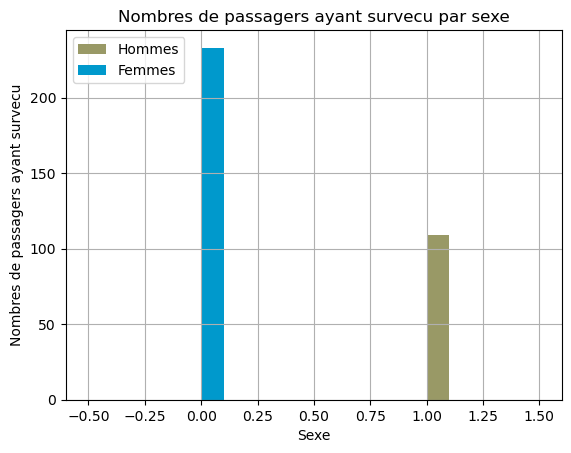

In [63]:
le = LabelEncoder()

le.fit(titanic_df['Sex']) 

titanic_df['Sex']= le.transform(titanic_df['Sex'])

fig,ax = plt.subplots()
titanic_df[(titanic_df['Sex']== 1)&(titanic_df['Survived']== 1)]['Sex'].hist(ax = ax, color =  '#999966', label = 'Hommes' )
titanic_df[(titanic_df['Sex']== 0)&(titanic_df['Survived']== 1)]['Sex'].hist(ax = ax, color = '#0099CC', label = 'Femmes')
ax.set_xlabel('Sexe')
ax.set_ylabel('Nombres de passagers ayant survecu')
ax.set_title('Nombres de passagers ayant survecu par sexe')
ax.legend()

In [64]:
print(f"Nombre de femmes ayant survecu: {survived_women}\nNombre d'hommes ayant survecu: {survived_men}")  

Nombre de femmes ayant survecu: 233
Nombre d'hommes ayant survecu: 109


In [65]:
def pie_plotter(col_name,col_label, colors, title, start,end, loc):
    """
    Creates a pie chart displaying the proportions of a specific column within the Titanic dataset for survivors.

    Parameters:
    ----------
    col_name : str
        The name of the column in the DataFrame to analyze.
    col_label : list
        Labels for the pie chart segments.
    colors : list
        Colors for each segment of the pie chart.
    title : str
        Title of the pie chart.
    start : int
        Starting value of the range to include in the analysis.
    end : int
        Ending value (exclusive) of the range to include in the analysis.
    loc : str
        Location of the legend (e.g., 'upper right', 'lower left').

    Returns:
    -------
    None
        Displays a pie chart based on the specified parameters.
    """
    class_prop = []
    col_label = col_label
    for i in range(start,end):
        class_prop.append(round(len(titanic_df[(titanic_df['Survived']==1)&(titanic_df[col_name]==i)][col_name])/len(titanic_df[titanic_df['Survived']==1]['Survived']),2))
    fig, ax = plt.subplots()
    mpl.rcParams["legend.loc"] = loc
    ax.pie(class_prop , labels= col_label, colors = colors, autopct='%1.1f%%')
    ax.set_title(title)
    plt.tight_layout()
    ax.legend();
    

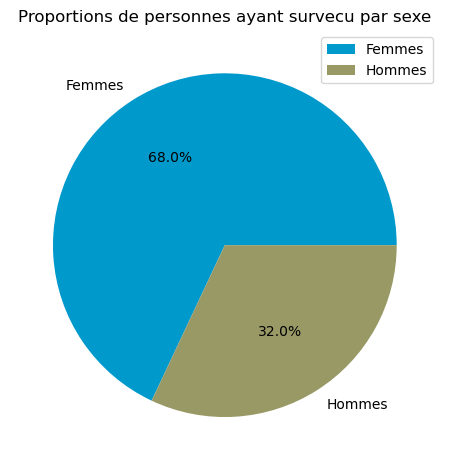

In [66]:
pie_plotter('Sex',['Femmes','Hommes'], ['#0099CC','#999966'], 
            'Proportions de personnes ayant survecu par sexe', 0,2,'upper right')

Parmi les personnes ayant survecus, environ 68% sont des femmes et 32% sont des hommes. La survi d'une personne depend fortement de son sexe 

#### Proportion de survecu par classe socio-economique 

In [67]:
class_prop = []
pclass_label = ['Premiere classe','Deuxieme classe', 'Troisieme classe']
for i in range(1,4):
    class_prop.append(round(len(titanic_df[(titanic_df['Survived']==1)&(titanic_df['Pclass']==i)]['Pclass'])/len(titanic_df[titanic_df['Survived']==1]['Survived']),1))
    

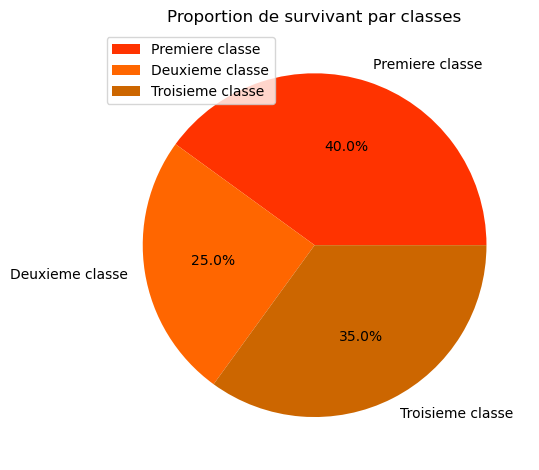

In [68]:
pie_plotter('Pclass',['Premiere classe','Deuxieme classe', 'Troisieme classe'],['#FF3300','#FF6600', '#CC6600'],
            'Proportion de survivant par classes',1,4,'upper left')

##### Test d'hypothèse
D'après le diagramme en camembert, il semblerait que les troisièmes classes ont plus de chances de survivre que les premières classes.
Vérifions alors cette hypothèse:

<<Les troisièmes classes ont moins de chance de survie que les premières classes>> 

Hypothèse nulle : Les troisièmes classes ont autant de chance de survie que les premières classes

Hypothèse relative : Les troisièmes classes ont moins de chance de survie que les premières classes


In [69]:
premiere_classe = titanic_df[titanic_df['Pclass']==1]
troisieme_classe = titanic_df[titanic_df['Pclass']==3]
stats,pvaleur = ttest_ind(premiere_classe['Survived'].dropna(),troisieme_classe['Survived'].dropna(),alternative='greater')
print(f'Les 3ème classe ont-il moins de chance de survie que les 1ère classe ?{pvaleur<0.02}')

Les 3ème classe ont-il moins de chance de survie que les 1ère classe ?True


##### Observation de la distribution des differentes variables numeriques

Text(0.5, 1.05, 'Distribution des differentes variables numeriques')

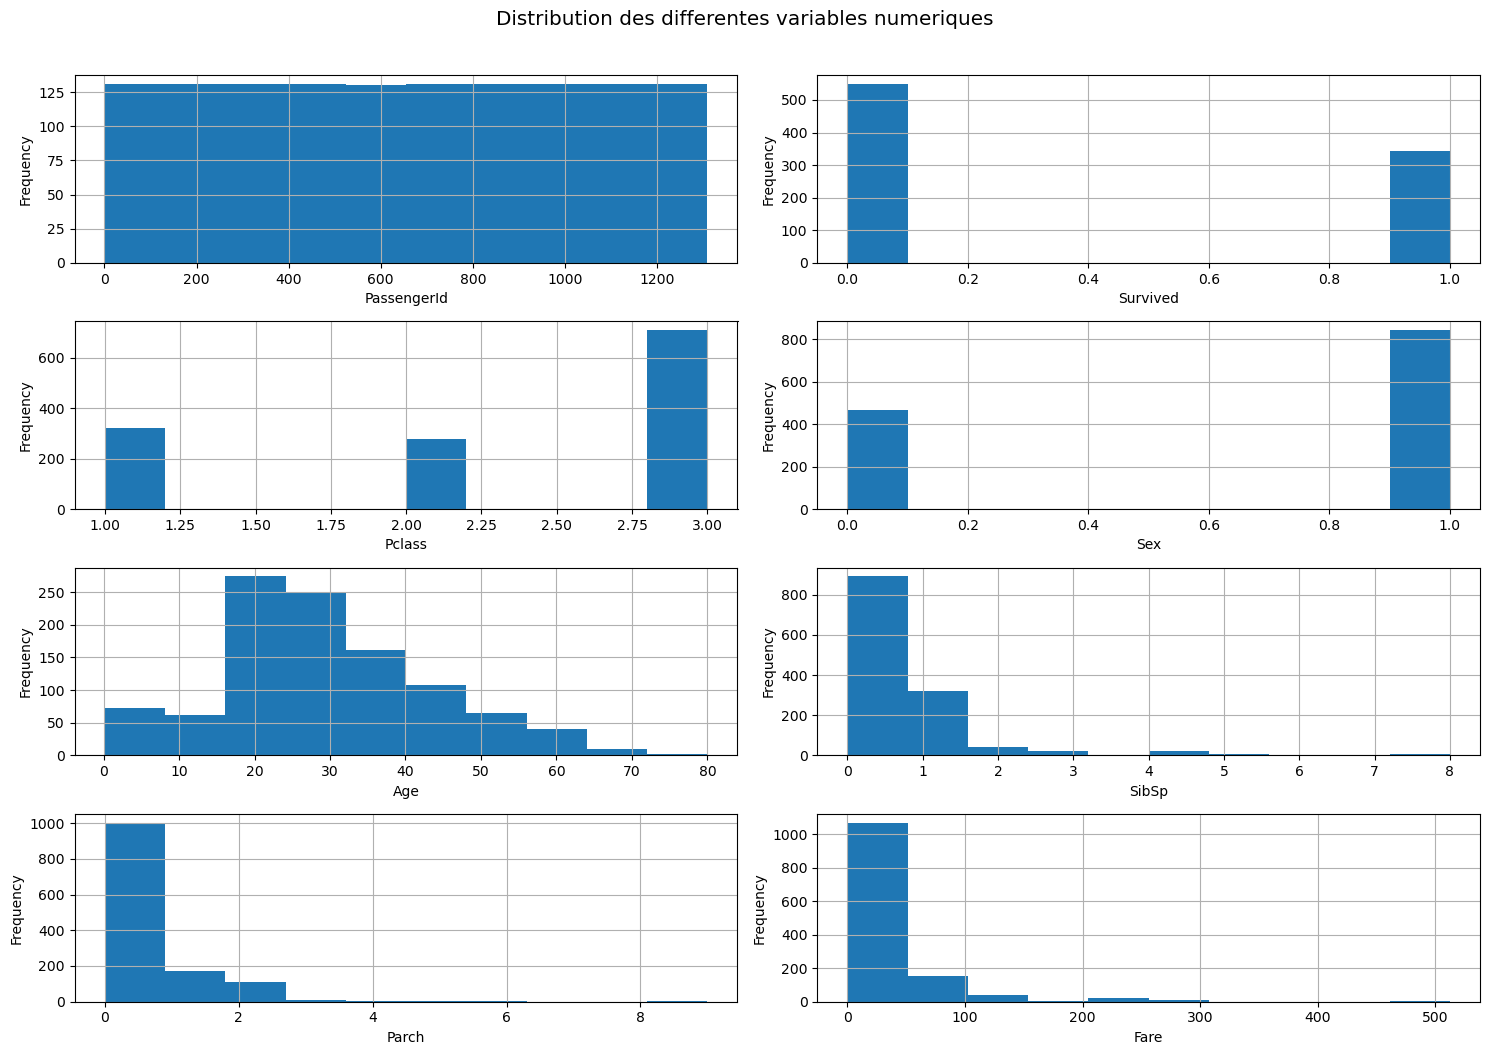

In [70]:
mpl.rcParams["figure.titlesize"] = 'x-large' 
fig, ax = plt.subplots(4,2,figsize=(15,10))
k = 0
num_col_names = ['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']                    
         
for i in range(4):
    for j in range(2):
        titanic_df[num_col_names[k]].plot(kind= 'hist', ax = ax[i,j])
        ax[i,j].set_xlabel(num_col_names[k])
        ax[i,j].grid()
        k+=1

        
plt.tight_layout()        
fig.suptitle('Distribution des differentes variables numeriques', y= 1.05)        

##### Proportion de survivant en fonction de l'age

In [71]:
def classe_age(row):
    """
    Categorizes an age value into predefined age classes.

    Parameters:
    ----------
    row : int or float
        The age value to categorize.

    Returns:
    -------
    int
        The age class:
        - 1 if age is less than 18
        - 2 if age is between 18 and 50 (inclusive)
        - 3 if age is greater than 50
    """
    
    if row < 18:
        row = 1
    elif row>=18 and row<=50:
        row = 2
    else: 
        row = 3
    return row

titanic_df['Aclass'] = titanic_df['Age'].apply(classe_age)

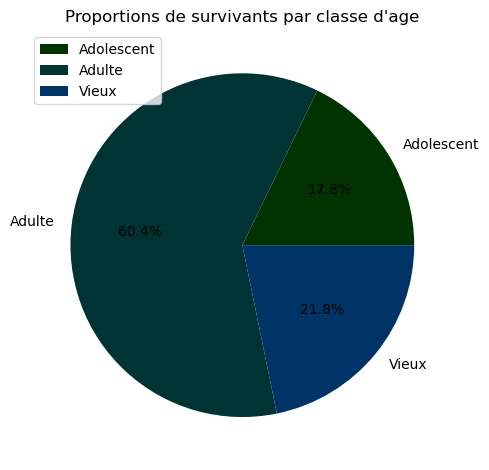

In [72]:
pie_plotter('Aclass',['Adolescent','Adulte', 'Vieux'],['#003300','#003333','#003366'], "Proportions de survivants par classe d'age"
           , 1,4,'upper left')

##### Relation entre le prix et l'age

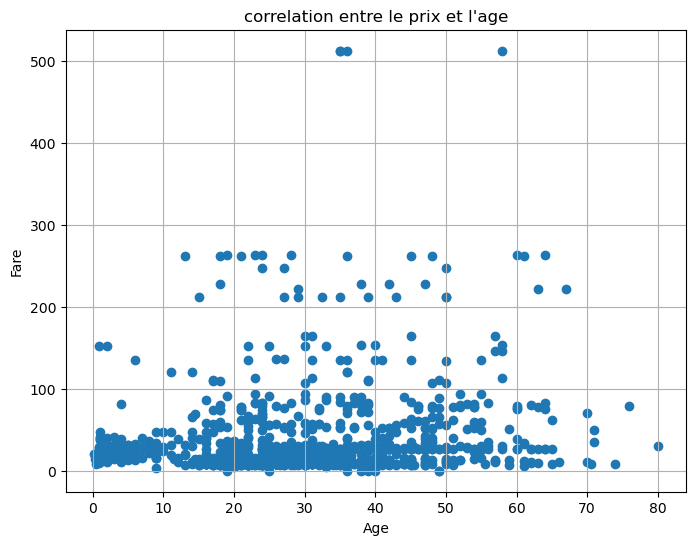

In [73]:
fig, ax = plt.subplots(figsize= (8,6))
ax.scatter(titanic_df['Age'].values, titanic_df['Fare'].values)
ax.grid()
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title("correlation entre le prix et l'age")
plt.show()

##### Correlation de Pearson entre l'age et le prix de ticket

correlation entre l'age et le prix de ticket


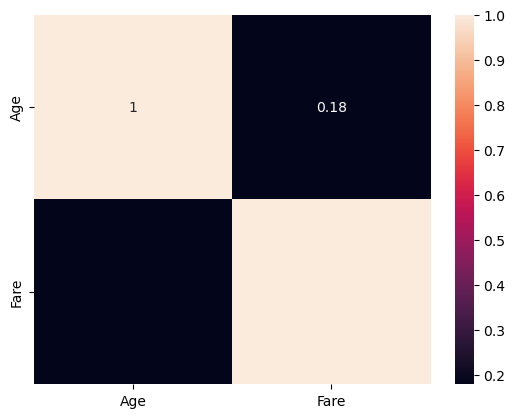

In [74]:
print(f"correlation entre l'age et le prix de ticket")
sns.heatmap(titanic_df[['Age','Fare']].corr(), annot= True);

##### Corrélation de Spearman entre l'age et le prix de ticket

correlation entre l'age et le prix de ticket


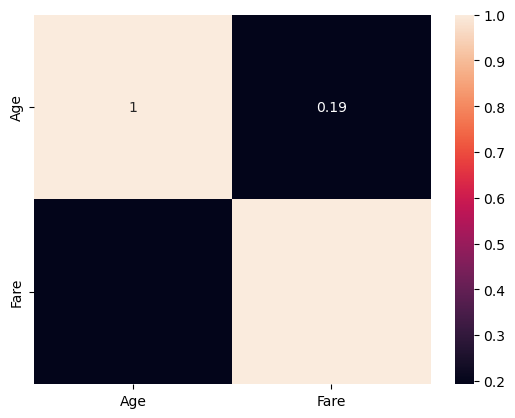

In [75]:
print(f"correlation entre l'age et le prix de ticket")
sns.heatmap(titanic_df[['Age','Fare']].corr(method= 'spearman'), annot= True);

##### Corrélation entre classe sociale et survie

In [76]:
print(f"Tableau de correlation entre la classe et la survie:\n\n{titanic_df[['Pclass','Survived']].corr(method='pearson')}")

Tableau de correlation entre la classe et la survie:

            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000


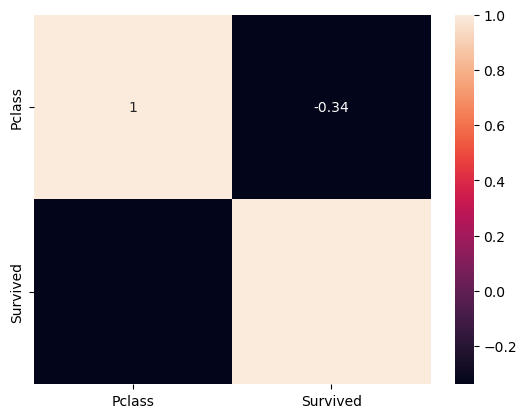

In [77]:
sns.heatmap(titanic_df[['Pclass','Survived']].corr(method= 'pearson'), annot= True);